**Data Science Challenge**

 Case Study

Company is currently supporting the growth and strategic direction of an
online ecommerce business. This business currently has a large drop
off rate with many online customers failing to add an item to cart after
a session online. In 2024 this business wants to tackle this issue and
increase online conversion rates therefore driving hig her revenue and
increasing their customer base.
Challenge is two-fold:
1. Build a predictive model that can identify a customer's propensity
to purchase using data related to their website behavior
2. Answer a set of questions related to this model, that are set out in
detail, later in this pack.

For this challenge, we have a data related to the  website behavior

**Data Description**

1.   fullVisitorId - The unique visitor ID.
2.   visitStartTime - The timestamp (expressed as POSIX time).
3.   date - The date of the session.
4.   deviceCategory - The type of device (Mobile, Tablet, Desktop).
5.   isMobile - If the user is on a mobile device, this value is true, otherwise false.
6.   operatingSystem -  The operating system of the device (e.g., "Macintosh" or "Windows").
7.   browser -The browser used (e.g., "Chrome" or "Firefox").
8.   country - The country from which sessions originated, based on IP address.
9.   city    - Users' city, derived from their IP addresses or Geographical IDs
10.  trafficSource - The source of the traffic source. Could be the name of the search engine, the referring hostname, or a value of the utm_source URL
parameter.
11.  trafficMedium - The medium of the traffic source. Could be "organic", "cpc", "referral", or the value of the utm_medium URL parameter.
12.  trafficCampaign - The campaign value. Usually set by the utm_campaign URL parameter.
13.  isFirstVisit - 1 if this is the first visit made by the visitor, otherwise 0.
14.  isBounce - 1 if the visitor went to only one webpage and did not come back, otherwise 0.
15.  totalVisits - The total number of visits by the visitor across sessions.
16.  totalHits - The total number of interactions across sessions.
17.  totalPageviews - The total number of page views across sessions.
18.  totalTimeOnSite - The total time on site.
19.  totalTransactions - The total number of interactions across sessions.
20.  productPagesViewed - The number of product pages viewed in the session.
21.  addedToCart - If the visitor added an item to the cart or made further downstream - actions (checkout, transaction), otherwise 0 (if the visitor only browsed but never added an item to the cart).





**Importing All the required packages and libraries**


In [ ]:
import os
import time
import pickle
import re
import numpy as np
import pandas as pd
import uuid
import matplotlib.pyplot as plt
import seaborn as sns
import re
import shap

#Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#MachineLEarning Models

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb


**Defining Functions**

In [ ]:
def number_to_uuid(num):
    return uuid.uuid5(uuid.NAMESPACE_URL, str(num))

def clean_key(value):
    value = re.sub(r'\.com$', '', value)  # Remove ".com" at the end
    value = re.sub(r'\s+', '', value)  # Remove spaces
    value = re.sub(r'\W+', '', value)  # Remove non-word characters (special characters)

    return value

**Data Loading**

In [ ]:
#setting the path to coorect folder
path = '/content/drive/MyDrive/Data'
os.chdir(path)
os.getcwd()

'/content/drive/MyDrive/Data'

In [ ]:
data = pd.read_csv('Data Curated.csv')

<ipython-input-29-d22aacfb2aff>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data Curated.csv')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765707 entries, 0 to 765706
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   fullVisitorId       765707 non-null  object
 1   visitStartTime      765707 non-null  int64 
 2   date                765707 non-null  object
 3   deviceCategory      765707 non-null  object
 4   isMobile            765707 non-null  bool  
 5   operatingSystem     765707 non-null  object
 6   browser             765707 non-null  object
 7   country             765707 non-null  object
 8   city                765707 non-null  object
 9   trafficSource       765707 non-null  object
 10  trafficMedium       765707 non-null  object
 11  trafficCampaign     765707 non-null  object
 12  isFirstVisit        765707 non-null  int64 
 13  totalVisits         765707 non-null  int64 
 14  totalHits           765707 non-null  int64 
 15  totalPageviews      765707 non-null  int64 
 16  to

In [ ]:
data.head()

,fullVisitorId,visitStartTime,date,deviceCategory,isMobile,operatingSystem,browser,country,city,trafficSource,trafficMedium,trafficCampaign,isFirstVisit,totalVisits,totalHits,totalPageviews,totalTimeOnSite,productPagesViewed,addedToCart
0,271404407559213408.0,1486853631,2023-02-11,tablet,True,iOS,Chrome,United States,not available in demo dataset,dfa,cpm,(not set),0,1,1,1,0,0,0
1,7357823685878908928.0,1479458674,2022-11-18,mobile,True,iOS,Safari,United States,Mountain View,dfa,cpm,(not set),0,1,1,1,0,0,0
2,798533321440560384.0,1480021304,2022-11-24,mobile,True,iOS,Safari,United States,not available in demo dataset,dfa,cpm,(not set),0,1,1,1,0,0,0
3,9138428854186547200.0,1480884549,2022-12-04,mobile,True,iOS,Safari,United States,not available in demo dataset,dfa,cpm,(not set),0,1,1,1,0,0,0
4,4410119776419873792.0,1491796955,2023-04-09,mobile,True,iOS,Chrome,United States,Palo Alto,dfa,cpm,(not set),0,1,1,1,0,0,0


In [ ]:
data.tail()

,fullVisitorId,visitStartTime,date,deviceCategory,isMobile,operatingSystem,browser,country,city,trafficSource,trafficMedium,trafficCampaign,isFirstVisit,totalVisits,totalHits,totalPageviews,totalTimeOnSite,productPagesViewed,addedToCart
765702,4903244865428862983,1471399014,2022-08-16,desktop,False,Macintosh,Firefox,United States,Sunnyvale,(direct),(none),(not set),1,1,500,333,4421,82,1
765703,5584945563861944723,1471454008,2022-08-17,desktop,False,Windows,Chrome,United States,not available in demo dataset,(direct),(none),(not set),1,1,246,149,4424,73,1
765704,4725577328776123367,1476752663,2022-10-17,desktop,False,Chrome OS,Chrome,United States,not available in demo dataset,(direct),(none),(not set),1,1,247,185,4038,35,1
765705,7558132299181088801,1480490313,2022-11-29,mobile,True,Android,Chrome,Fiji,not available in demo dataset,(direct),(none),(not set),1,1,249,126,738,123,0
765706,4086679804074527652,1473179394,2022-09-06,desktop,False,Windows,Chrome,Malaysia,not available in demo dataset,google,organic,(not set),0,1,250,164,3953,78,1


In [ ]:
data.apply(lambda x: sum(x.isnull()),axis=0)

fullVisitorId         0
visitStartTime        0
date                  0
deviceCategory        0
isMobile              0
operatingSystem       0
browser               0
country               0
city                  0
trafficSource         0
trafficMedium         0
trafficCampaign       0
isFirstVisit          0
totalVisits           0
totalHits             0
totalPageviews        0
totalTimeOnSite       0
productPagesViewed    0
addedToCart           0
dtype: int64

In [ ]:
for col in data.select_dtypes(include=['object']).columns:
    print(f'Summary for {col}:')
    print(data[col].value_counts())
    print()

Summary for fullVisitorId:
fullVisitorId
8.248397e+17    219
1.957459e+18    211
3.608475e+18    200
1.856749e+18    181
7.634897e+18    140
               ... 
8.089141e+18      1
5.528325e+18      1
8.833223e+18      1
7.791714e+18      1
5.852665e+18      1
Name: count, Length: 625642, dtype: int64

Summary for date:
date
2022-11-28    4807
2022-11-15    4685
2022-11-14    4466
2022-11-30    4435
2022-10-26    4375
              ... 
2023-05-14    1290
2023-05-13    1251
2022-12-30    1232
2022-12-24    1231
2022-12-31    1211
Name: count, Length: 304, dtype: int64

Summary for deviceCategory:
deviceCategory
desktop    575126
mobile     165948
tablet      24633
Name: count, dtype: int64

Summary for operatingSystem:
operatingSystem
Windows          302872
Macintosh        222526
Android           99907
iOS               84194
Linux             29053
Chrome OS         21500
(not set)          3858
Windows Phone      1103
Samsung             214
BlackBerry          190
Nintendo Wii   

In [ ]:
data.groupby('trafficSource').size()

trafficSource
(direct)              311921
(not set)                 69
9to5google.com             2
Partners               13258
ad.doubleclick.net         3
                       ...  
wheretoget.it             13
yahoo                   1272
yahoo.com                  1
yandex                     3
youtube.com           204233
Length: 258, dtype: int64

In [ ]:
data.groupby('trafficMedium').size()

trafficMedium
(none)       311920
(not set)       116
affiliate     13250
cpc            9645
cpm            5191
organic      181006
referral     244579
dtype: int64

**Data Pre-Processing**

In [ ]:
data['fullVisitorId_transformed'] = data['fullVisitorId'].apply(number_to_uuid) # To change the visitorID to unique ID
data['visitStartTime'] = pd.to_datetime(data['visitStartTime'], unit='s') # To change the posix time into datetime
data['trafficSource'] = data['trafficSource'].apply(clean_key) # To remove special characters,.com,space
data['trafficMedium'] = data['trafficMedium'].apply(clean_key) # To remove special characters,.com,space

In [ ]:
data_curated = data.drop(columns=['fullVisitorId','visitStartTime','isMobile','browser','city','trafficCampaign','totalVisits'])

print(data_curated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765707 entries, 0 to 765706
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   date                       765707 non-null  object
 1   deviceCategory             765707 non-null  object
 2   operatingSystem            765707 non-null  object
 3   country                    765707 non-null  object
 4   trafficSource              765707 non-null  object
 5   trafficMedium              765707 non-null  object
 6   isFirstVisit               765707 non-null  int64 
 7   totalHits                  765707 non-null  int64 
 8   totalPageviews             765707 non-null  int64 
 9   totalTimeOnSite            765707 non-null  int64 
 10  productPagesViewed         765707 non-null  int64 
 11  addedToCart                765707 non-null  int64 
 12  fullVisitorId_transformed  765707 non-null  object
dtypes: int64(6), object(7)
memory usage: 75.9+ M

In [ ]:
data_curated['date'] = pd.to_datetime(data['date'],errors='coerce') # To change the posix time into datetime
#data_curated['date'] = data_curated['date'].astype(int) / 10**9  # Convert nanoseconds to seconds


In [ ]:
print(data_curated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765707 entries, 0 to 765706
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       765707 non-null  datetime64[ns]
 1   deviceCategory             765707 non-null  object        
 2   operatingSystem            765707 non-null  object        
 3   country                    765707 non-null  object        
 4   trafficSource              765707 non-null  object        
 5   trafficMedium              765707 non-null  object        
 6   isFirstVisit               765707 non-null  int64         
 7   totalHits                  765707 non-null  int64         
 8   totalPageviews             765707 non-null  int64         
 9   totalTimeOnSite            765707 non-null  int64         
 10  productPagesViewed         765707 non-null  int64         
 11  addedToCart                765707 non-null  int64   

In [ ]:
data_curated.head()

,date,deviceCategory,operatingSystem,country,trafficSource,trafficMedium,isFirstVisit,totalHits,totalPageviews,totalTimeOnSite,productPagesViewed,addedToCart,fullVisitorId_transformed
0,2023-02-11,tablet,iOS,United States,dfa,cpm,0,1,1,0,0,0,64ce5e3f-c923-5241-863c-256e120b0267
1,2022-11-18,mobile,iOS,United States,dfa,cpm,0,1,1,0,0,0,747e25b5-a80a-5b72-ab37-2e25a1c1a7bb
2,2022-11-24,mobile,iOS,United States,dfa,cpm,0,1,1,0,0,0,6f3b20ab-1221-574e-80ff-c6bd87dbae5b
3,2022-12-04,mobile,iOS,United States,dfa,cpm,0,1,1,0,0,0,08277271-e006-5f32-a01d-f79afbe73f45
4,2023-04-09,mobile,iOS,United States,dfa,cpm,0,1,1,0,0,0,f830d8b5-eb28-53b4-8238-59f636bf1d2c


In [ ]:
data1=data_curated # For handling the categorical variables

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical variables
for column in ['deviceCategory', 'operatingSystem', 'country', 'trafficSource', 'trafficMedium',
               'fullVisitorId_transformed']:
    data1[column] = le.fit_transform(data1[column])

data1.head()

,date,deviceCategory,operatingSystem,country,trafficSource,trafficMedium,isFirstVisit,totalHits,totalPageviews,totalTimeOnSite,productPagesViewed,addedToCart,fullVisitorId_transformed
0,2023-02-11,2,19,209,46,2,0,1,1,0,0,0,246732
1,2022-11-18,1,19,209,46,2,0,1,1,0,0,0,285199
2,2022-11-24,1,19,209,46,2,0,1,1,0,0,0,272229
3,2022-12-04,1,19,209,46,2,0,1,1,0,0,0,20086
4,2023-04-09,1,19,209,46,2,0,1,1,0,0,0,606603


**MachineLearning Model**

**Preparing the data for training the model**

In [ ]:
# Feature matrix and target variable
X = data1.drop(columns=['addedToCart','date'])
y = data1['addedToCart']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Understanding the features relationship with the target variable:

**Random forest**

In [ ]:
start_time = time.time()
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Classifier: {accuracy:.4f}')

print(classification_report(y_test, y_pred))
# Calculate training time
training_time = time.time() - start_time
print(f'Training time: {training_time:.2f} seconds')

# Save the model
with open(f'rf_1.pkl', 'wb') as file:
        pickle.dump(model_rf, file)

end_time = time.time()
print(f" training and saving took {end_time - start_time:.2f} seconds\n")




Accuracy of Random Forest Classifier: 0.9630
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    144806
           1       0.69      0.57      0.63      8336

    accuracy                           0.96    153142
   macro avg       0.84      0.78      0.80    153142
weighted avg       0.96      0.96      0.96    153142

Training time: 90.35 seconds
 training and saving took 91.99 seconds



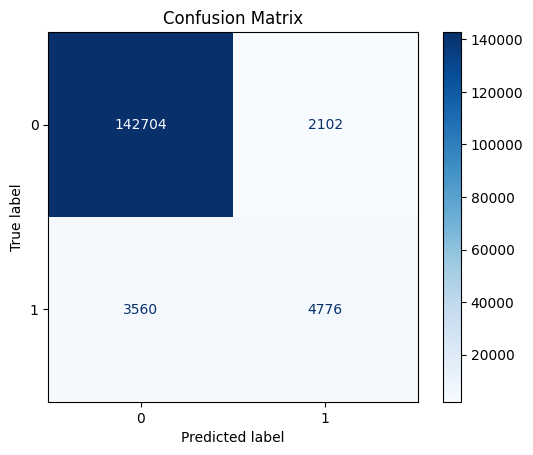

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**Model Explanation and Key Drivers**

A. Feature Importance



<Axes: xlabel='Importance', ylabel='Feature'>

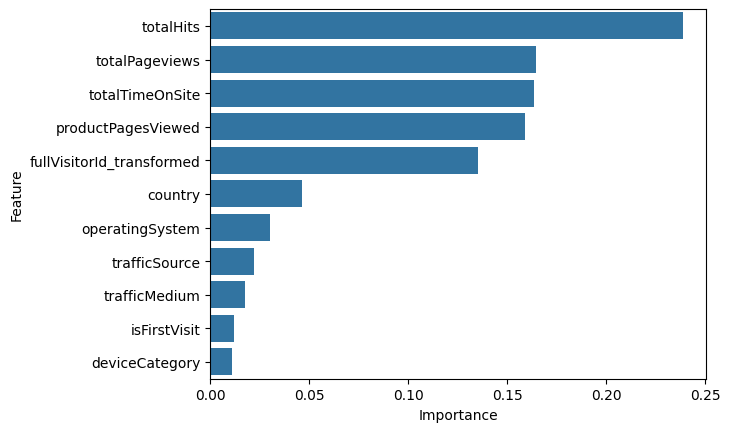

In [ ]:
# Feature importance
feature_importances = model_rf.feature_importances_
feature_importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x='Importance', y='Feature', data=importance_df)


**Logistic Regression**

In [ ]:
start_time = time.time()
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Predict on test data
y_pred = model_lr.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression: {accuracy:.4f}')

# Print classification report for more detailed evaluation
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Calculate training time
training_time = time.time() - start_time
print(f'Training time: {training_time:.2f} seconds')


# Save the model
with open(f'lr.pkl', 'wb') as file:
        pickle.dump(model_rf, file)

end_time = time.time()
print(f" training and saving took {end_time - start_time:.2f} seconds\n")

Accuracy of Logistic Regression: 0.9539
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    144806
           1       0.64      0.35      0.45      8336

    accuracy                           0.95    153142
   macro avg       0.80      0.67      0.71    153142
weighted avg       0.95      0.95      0.95    153142

Training time: 9.51 seconds
 training and saving took 10.81 seconds



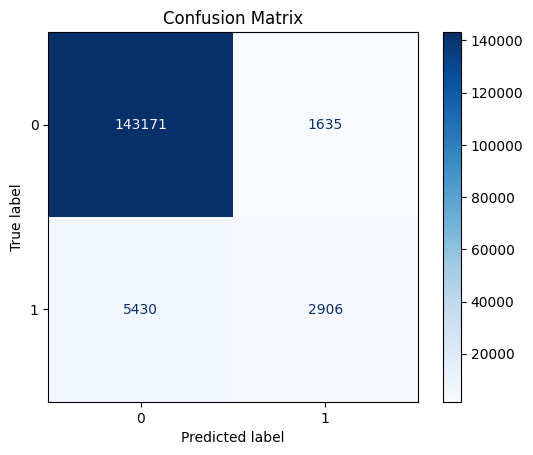

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_lr.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**XGBoost classifier**

In [ ]:
# Initialize XGBoost classifier
model_xgb = XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,  # Maximum depth of each tree
    learning_rate=0.1,  # Step size shrinkage
    random_state=42
)
start_time = time.time()
# Train the model
model_xgb.fit(X_train, y_train)

# Predict on test data
y_pred = model_xgb.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of XGBoost Classifier: {accuracy:.4f}')

# Print classification report for more detailed evaluation
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Calculate training time
training_time = time.time() - start_time
print(f'Training time: {training_time:.2f} seconds')


# Save the model
with open(f'xgb.pkl', 'wb') as file:
        pickle.dump(model_xgb, file)

end_time = time.time()
print(f" training and saving took {end_time - start_time:.2f} seconds\n")

Accuracy of XGBoost Classifier: 0.9596
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    144806
           1       0.70      0.45      0.55      8336

    accuracy                           0.96    153142
   macro avg       0.83      0.72      0.76    153142
weighted avg       0.95      0.96      0.96    153142

Training time: 5.57 seconds
 training and saving took 5.58 seconds



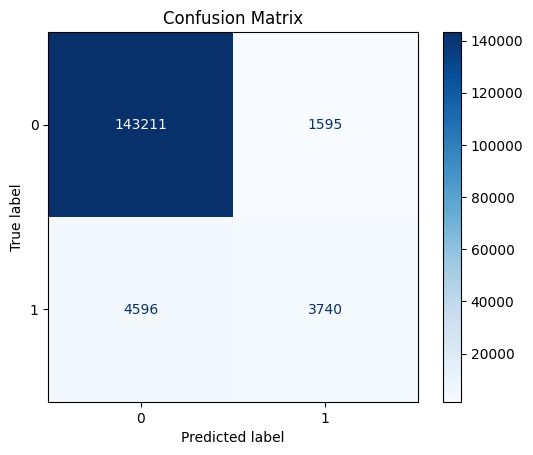

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

4. Model Explanation and Key Drivers
A. Feature Importance



<Axes: xlabel='Importance', ylabel='Feature'>

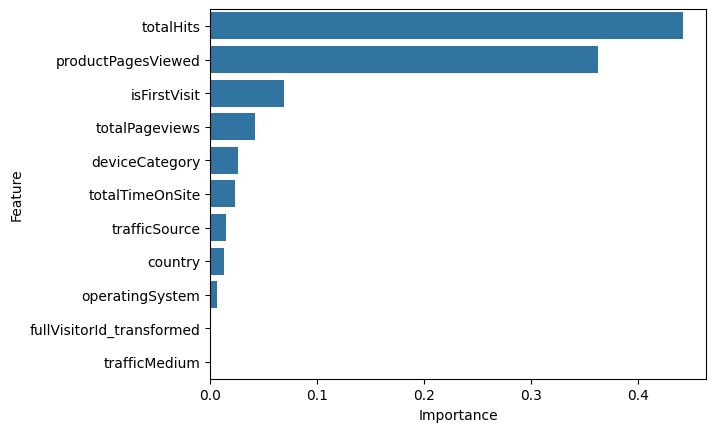

In [ ]:
# Feature importance
feature_importances = model_xgb.feature_importances_
feature_importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x='Importance', y='Feature', data=importance_df)


**DecissionTree**

In [ ]:
# Initialize Decision Tree classifier
model_dt = DecisionTreeClassifier(
    max_depth=3,  # Maximum depth of the tree
    min_samples_split=2,  # Minimum samples required to split an internal node
    random_state=42
)
start_time = time.time()
# Train the model
model_dt.fit(X_train, y_train)

# Predict on test data
y_pred = model_dt.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Decision Tree Classifier: {accuracy:.4f}')

# Print classification report for more detailed evaluation
print('Classification Report:')
print(classification_report(y_test, y_pred))
# Calculate training time
training_time = time.time() - start_time
print(f'Training time: {training_time:.2f} seconds')


# Save the model
with open(f'DT.pkl', 'wb') as file:
        pickle.dump(model_dt, file)

end_time = time.time()
print(f" training and saving took {end_time - start_time:.2f} seconds\n")

Accuracy of Decision Tree Classifier: 0.9556
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    144806
           1       0.67      0.37      0.48      8336

    accuracy                           0.96    153142
   macro avg       0.82      0.68      0.73    153142
weighted avg       0.95      0.96      0.95    153142

Training time: 1.34 seconds
 training and saving took 1.35 seconds



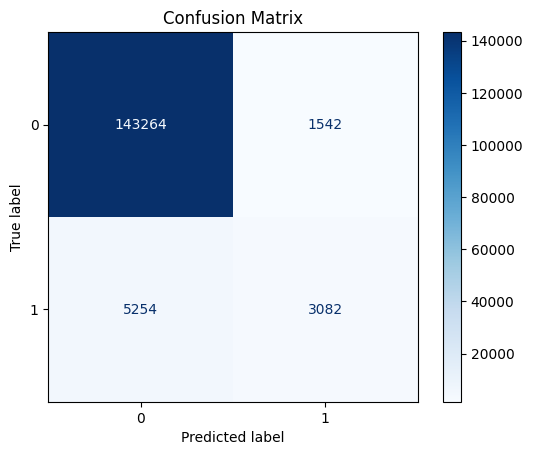

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

4. Model Explanation and Key Drivers
A. Feature Importance



<Axes: xlabel='Importance', ylabel='Feature'>

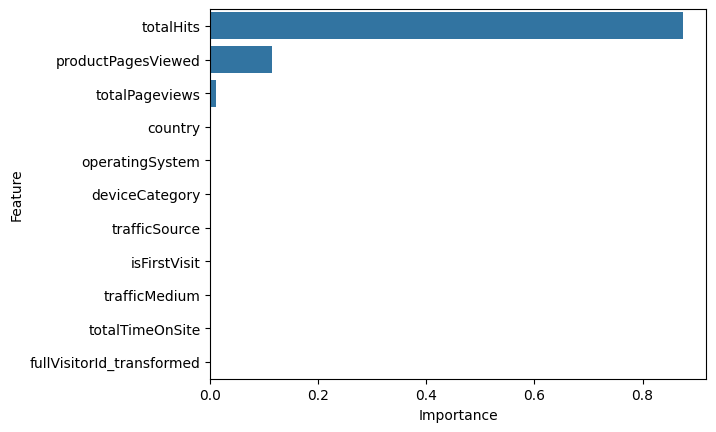

In [ ]:
# Feature importance
feature_importances = model_dt.feature_importances_
feature_importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x='Importance', y='Feature', data=importance_df)


**GradientBoosting**

In [ ]:
# Initialize Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
model_gbm = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages
    learning_rate=0.1,  # Shrinkage rate
    max_depth=3,  # Maximum depth of individual trees
    random_state=42
)
start_time = time.time()
# Train the model
model_gbm.fit(X_train, y_train)

# Predict on test data
y_pred = model_gbm.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Gradient Boosting Classifier: {accuracy:.4f}')

# Print classification report for more detailed evaluation
print('Classification Report:')
print(classification_report(y_test, y_pred))
# Calculate training time
training_time = time.time() - start_time
print(f'Training time: {training_time:.2f} seconds')

# Save the model
with open(f'GBM.pkl', 'wb') as file:
        pickle.dump(model_gbm, file)

end_time = time.time()
print(f" training and saving took {end_time - start_time:.2f} seconds\n")

Accuracy of Gradient Boosting Classifier: 0.9607
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    144806
           1       0.71      0.48      0.57      8336

    accuracy                           0.96    153142
   macro avg       0.84      0.73      0.77    153142
weighted avg       0.96      0.96      0.96    153142

Training time: 111.26 seconds
 training and saving took 111.27 seconds



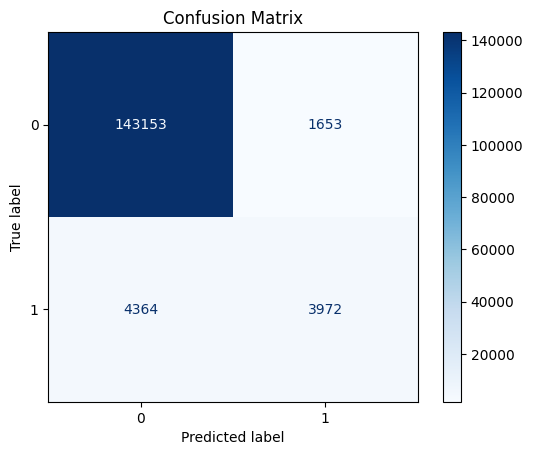

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_gbm.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

4. Model Explanation and Key Drivers
A. Feature Importance



<Axes: xlabel='Importance', ylabel='Feature'>

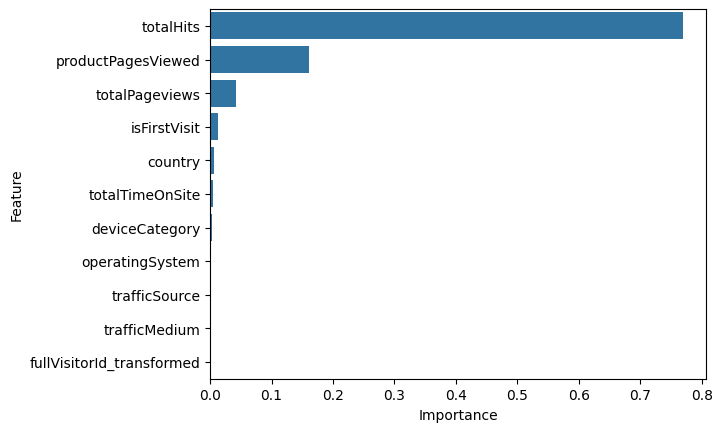

In [ ]:
# Feature importance
feature_importances = model_gbm.feature_importances_
feature_importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x='Importance', y='Feature', data=importance_df)


**Evaluation**

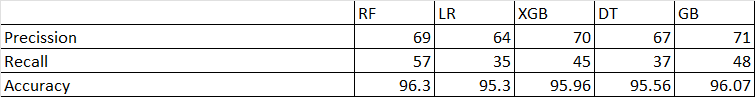

From the above table we can infer that Random forest has the best accuracy accross the tested models and also has a far better recall rate for Class(1) so our final model would be **RandomForest**

**Questions**

**1: Explanation of the Final Model and Approach:**

Model Selection:
The final model used for predicting the propensity to purchase is Random Forest (RF) as Random forest has the best accuracy accross the tested models and also has a far better recall rate for Class(1) so our final model would be RandomForest

**2: Key Drivers for Propensity to Purchase:**

Based on the model analysis and feature importance:

1.   TotalHits
2.   ProductPagesViewed
3.   TotalTimeOnSite
4.   TotalPageview

These variables are strong indicators of interest in products/services, larger the counts(i.e hits,TimeSpent,TotalPageviewed) better the chances of Propensity to Purchase.

**3: Recommendations to the Client and Utilization of the Model:**

Based on the model exploration following reccomendations would be suggested

1.   To improve on the contents of webpages to increase the user engagement time spent on pages more and also encourage the users to explore more pages. These factors indicate that there is a high chance that these factors drives the propensity to purchase.
2.   Model can be used to check the propensity to purchase accross various marketing strategies in order to implement different marketing campaigns.
3. Models can be leveraged to address the clients goals for 2024 such as increasing conversion rates and improving customer retention to drive revenue growth.



**4: Improvement / Challenges**

*Challenges*
As the given dataset provided was pretty imbalanced with majority of the records being 0 compare to 1,
To improve the imbalance, we can apply various techniques such as

1.   Oversampling the minority class
2.   Undersampling the majority
3. Applying synthetic data to create synthetic data for class1 for solving the imbalance issue
4. Address the Data quality - Few columns had too many distinct values and had a lots of data quality issues.

*ModelTuning*

1.   Fine tune model parameters and thresholds to improve precission and recall
2.   Implement advanced ensemble techniques to combine model outputs more effectively.




**END**